## Countries Data

In [1]:
import pandas as pd
import missingno as msno

In [2]:
# This is our data
df = pd.read_csv('clean_flights.csv ')
# we want to add more features to it so we can increase our model performance
# we'll start with merging these new countries data (downloaded from Kaggle) with our original data
# link : https://www.kaggle.com/datasets/fernandol/countries-of-the-world
# but let's check it first
countries_data = pd.read_csv("new_features/countries_of_the_world.csv")

In [3]:
# After inspecting the csv file I remarked that some columns finish with a space, let's fix it
countries_data['Country'] = countries_data['Country'].apply(str.strip)
countries_data['Region'] = countries_data['Region'].apply(str.strip)

<AxesSubplot: >

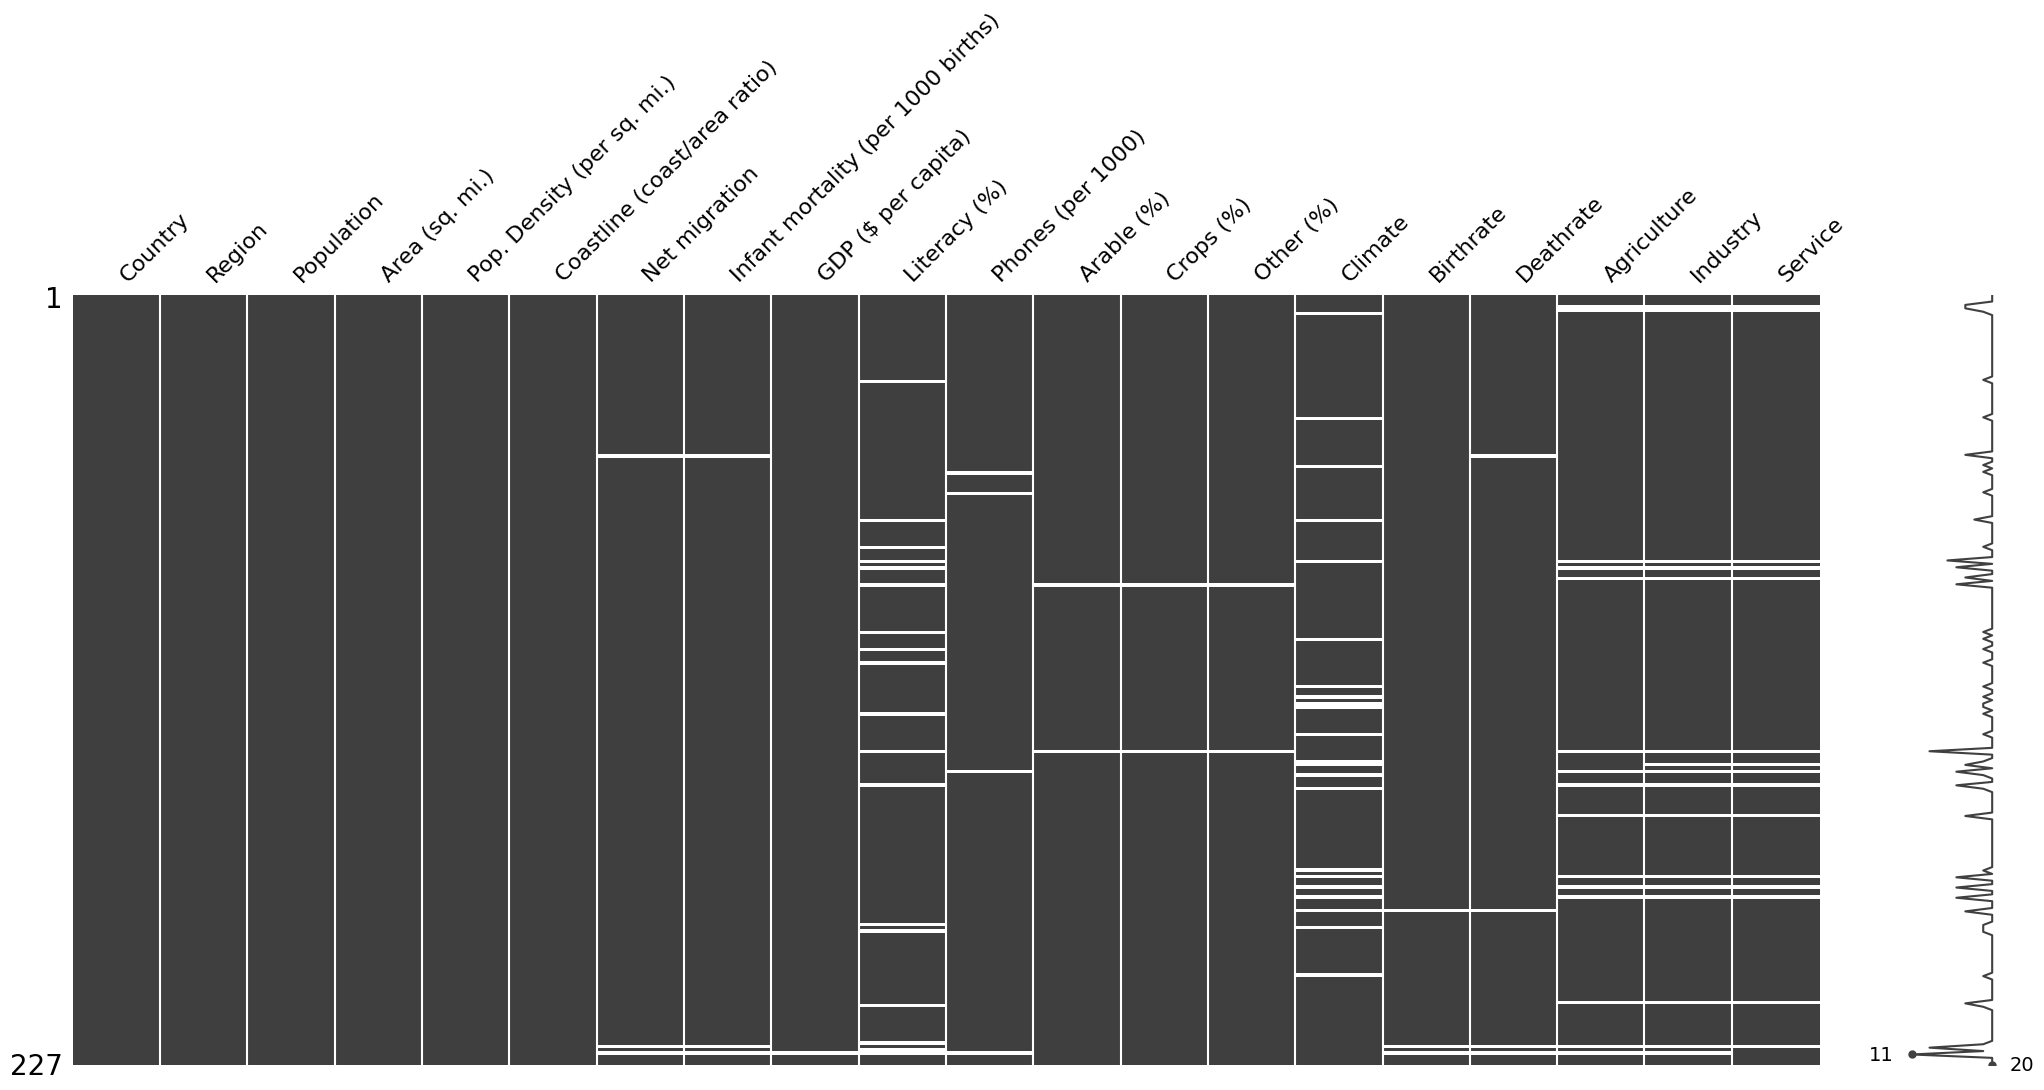

In [4]:
# Now let's see if there is any missing data
msno.matrix(countries_data)
# we can see that some column have many missing values
# those values cannot be imputed as they depends on a lot of parameters

In [5]:
# We dropped the columns that have many missing values
countries_data.drop(['Literacy (%)','Climate', 'Agriculture', 'Industry', 'Service'], axis=1, inplace=True)
# we'll also drop the phones column because its irrelevant
# and the arable/crops/other column are not accurate basing on the source, so let's remove it
countries_data.drop(['Arable (%)','Crops (%)', 'Other (%)', 'Phones (per 1000)'], axis=1, inplace=True)
# Let's check the remaining rows if they have any intersection with ours
nan_rows = countries_data[countries_data.isnull().any(axis=1)]
nan_rows[nan_rows['Country'].isin(df['country'])]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Birthrate,Deathrate
47,Cook Islands,OCEANIA,21388,240,"89,1","50,00",NaN,NaN,5000.0,21,NaN
181,Serbia,EASTERN EUROPE,9396411,88361,"106,3","0,00","-1,33","12,89",2200.0,NaN,NaN


In [6]:
# If we sacrifice those 2 countries se'll lose approximatively 40 rows from our original data
# in the other hand, if we keep them we'll lose 4 columns !
# We choosed to drop those rows
countries_data.drop([47, 181], inplace=True)

In [7]:
# We'll rename the columns to keep the simplicity
countries_data.columns = ['country', 'region', 'population', 'area', 'pop_density', 'coastline',
                          'migration', 'infant_mortality', 'gdp', 'birthrate', 'deathrate']

In [8]:
# Let's check columns types
countries_data.dtypes

country              object
region               object
population            int64
area                  int64
pop_density          object
coastline            object
migration            object
infant_mortality     object
gdp                 float64
birthrate            object
deathrate            object
dtype: object

In [9]:
# Some column must be converted to float
cols = ['pop_density', 'coastline', 'migration', 'infant_mortality', 'birthrate', 'deathrate']
for col in cols :
    countries_data[col] = countries_data[col].str.replace(',', '.').astype(float)

In [10]:
print("We have ", len(df['country'].unique()), " different country in our original data.")
print("and ", len(countries_data['country'].unique()), " different country in the additionnal data.")

We have  182  different country in our original data.
and  225  different country in the additionnal data.


In [11]:
# Now let's merge the data all together
data = pd.merge(df, countries_data, how='right', on='country')
data

,country,city,duration,stops,departure_time,arrival_time,airport_id,airline,price,duration_s_,...,region,population,area,pop_density,coastline,migration,infant_mortality,gdp,birthrate,deathrate
0,Afghanistan,Kabul,0 days 11:40:00,1.0,2024-03-15 15:05:00,2024-03-16 07:15:00,KBL,Fly Emirates,1076.0,42000.0,...,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.0,23.06,163.07,700.0,46.60,20.34
1,Afghanistan,Kabul,0 days 12:40:00,1.0,2024-03-15 15:05:00,2024-03-16 08:15:00,KBL,Fly Emirates,1076.0,45600.0,...,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.0,23.06,163.07,700.0,46.60,20.34
2,Afghanistan,Kabul,0 days 19:30:00,1.0,2024-03-15 15:05:00,2024-03-16 15:05:00,KBL,Fly Emirates,1076.0,70200.0,...,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.0,23.06,163.07,700.0,46.60,20.34
3,Afghanistan,Kabul,1 days 00:20:00,2.0,2024-03-15 02:25:00,2024-03-16 07:15:00,KBL,Lufthansa,1947.0,87600.0,...,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.0,23.06,163.07,700.0,46.60,20.34
4,Afghanistan,Kabul,1 days 01:20:00,2.0,2024-03-15 02:25:00,2024-03-16 08:15:00,KBL,Lufthansa,2409.0,91200.0,...,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.0,23.06,163.07,700.0,46.60,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12584,Zimbabwe,Harare,1 days 13:05:00,3.0,2024-03-15 02:25:00,2024-03-16 17:30:00,HRE,Lufthansa,497.0,133500.0,...,SUB-SAHARAN AFRICA,12236805,390580,31.3,0.0,0.00,67.69,1900.0,28.01,21.84
12585,Zimbabwe,Harare,1 days 13:05:00,3.0,2024-03-15 02:25:00,2024-03-16 17:30:00,HRE,Lufthansa,497.0,133500.0,...,SUB-SAHARAN AFRICA,12236805,390580,31.3,0.0,0.00,67.69,1900.0,28.01,21.84
12586,Zimbabwe,Harare,0 days 20:30:00,2.0,2024-03-15 17:10:00,2024-03-16 15:40:00,HRE,Turkish Airlines,835.0,73800.0,...,SUB-SAHARAN AFRICA,12236805,390580,31.3,0.0,0.00,67.69,1900.0,28.01,21.84
12587,Zimbabwe,Harare,1 days 07:00:00,3.0,2024-03-15 11:30:00,2024-03-16 20:30:00,HRE,TAP Air Portugal,610.0,111600.0,...,SUB-SAHARAN AFRICA,12236805,390580,31.3,0.0,0.00,67.69,1900.0,28.01,21.84


In [12]:
# Before continuing, I would like to convert units from the imperial system to the metric system
data['area'] = data['area'] * 2.58999
data['pop_density'] = data['pop_density'] * 2.58999

## Distance to Casablanca

In [13]:
# Now we want to add the distance between Casablanca and the destination city
# to do that we scrapped data from https://www.distancecalculator.net/
# please refrence to "Part3_2_DistanceScraping.ipynb" for more details
distances = pd.read_csv("new_features/distances.csv")

In [14]:
distances.sample(3, random_state=41)

,city,country,distance
596,Montevideo,Uruguay,9142.38
328,Vilnius,Lithuania,3463.88
70,Edmonton,Canada,8001.65


In [15]:
data = pd.merge(data, distances, how='left', on=['country', 'city']).dropna()
data

,country,city,duration,stops,departure_time,arrival_time,airport_id,airline,price,duration_s_,...,population,area,pop_density,coastline,migration,infant_mortality,gdp,birthrate,deathrate,distance
0,Afghanistan,Kabul,0 days 11:40:00,1.0,2024-03-15 15:05:00,2024-03-16 07:15:00,KBL,Fly Emirates,1076.0,42000.0,...,31056997,1.677019e+06,124.319520,0.0,23.06,163.07,700.0,46.60,20.34,6887.77
1,Afghanistan,Kabul,0 days 12:40:00,1.0,2024-03-15 15:05:00,2024-03-16 08:15:00,KBL,Fly Emirates,1076.0,45600.0,...,31056997,1.677019e+06,124.319520,0.0,23.06,163.07,700.0,46.60,20.34,6887.77
2,Afghanistan,Kabul,0 days 19:30:00,1.0,2024-03-15 15:05:00,2024-03-16 15:05:00,KBL,Fly Emirates,1076.0,70200.0,...,31056997,1.677019e+06,124.319520,0.0,23.06,163.07,700.0,46.60,20.34,6887.77
3,Afghanistan,Kabul,1 days 00:20:00,2.0,2024-03-15 02:25:00,2024-03-16 07:15:00,KBL,Lufthansa,1947.0,87600.0,...,31056997,1.677019e+06,124.319520,0.0,23.06,163.07,700.0,46.60,20.34,6887.77
4,Afghanistan,Kabul,1 days 01:20:00,2.0,2024-03-15 02:25:00,2024-03-16 08:15:00,KBL,Lufthansa,2409.0,91200.0,...,31056997,1.677019e+06,124.319520,0.0,23.06,163.07,700.0,46.60,20.34,6887.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12584,Zimbabwe,Harare,1 days 13:05:00,3.0,2024-03-15 02:25:00,2024-03-16 17:30:00,HRE,Lufthansa,497.0,133500.0,...,12236805,1.011598e+06,81.066687,0.0,0.00,67.69,1900.0,28.01,21.84,7035.66
12585,Zimbabwe,Harare,1 days 13:05:00,3.0,2024-03-15 02:25:00,2024-03-16 17:30:00,HRE,Lufthansa,497.0,133500.0,...,12236805,1.011598e+06,81.066687,0.0,0.00,67.69,1900.0,28.01,21.84,7035.66
12586,Zimbabwe,Harare,0 days 20:30:00,2.0,2024-03-15 17:10:00,2024-03-16 15:40:00,HRE,Turkish Airlines,835.0,73800.0,...,12236805,1.011598e+06,81.066687,0.0,0.00,67.69,1900.0,28.01,21.84,7035.66
12587,Zimbabwe,Harare,1 days 07:00:00,3.0,2024-03-15 11:30:00,2024-03-16 20:30:00,HRE,TAP Air Portugal,610.0,111600.0,...,12236805,1.011598e+06,81.066687,0.0,0.00,67.69,1900.0,28.01,21.84,7035.66


In [16]:
# Summary :
#       - 12748 rows -> 12529 rows 89
#       - 10 columns -> 25 columns

In [17]:
data.to_csv("DATA.csv", index=False)